In [83]:
import pandas as pd
import numpy as np


# ACCOUNTS

In [84]:
# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
playbacks = './data/playbacks.csv'
subscriptions = './data/subscriptions.csv'

In [85]:
# Read accounts (01.10.2020 - 01.10.2022)
df_accounts = pd.read_csv(accounts)
df_accounts.columns = df_accounts.columns.str.lower()
display(df_accounts.shape)
display(df_accounts.head())

(17079, 7)

,account_key,postal_code,city,language,country_code,onetime_rental_count,subscription_count
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,0,1
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,0,1
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,1,0
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,0,2
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,8,2


In [86]:
df_accounts.dtypes

account_key             object
postal_code             object
city                    object
language                object
country_code            object
onetime_rental_count     int64
subscription_count       int64
dtype: object

In [87]:
display(df_accounts.country_code.nunique())
df_accounts.country_code.unique()

56

array(['CH', 'DE', 'GR', 'LI', 'US', 'AT', 'TH', 'FR', 'GB', 'BE', 'RU',
       'EG', 'HK', 'PT', 'IT', 'SA', 'NZ', 'MX', 'PE', 'CO', 'PL', 'CA',
       'ID', 'ES', 'HU', 'IL', 'NO', 'AU', 'CL', 'NL', 'ZA', 'JO', 'RS',
       'RO', 'IE', 'KR', 'SK', 'AE', 'GH', 'BR', 'MY', 'SE', 'CZ', 'DK',
       'IN', 'JP', 'TR', 'CI', 'EE', 'GA', 'SM', 'WF', 'FI', 'UA', 'SG',
       'IR'], dtype=object)

In [88]:
df_accounts.country_code.value_counts()
#16.5k DACH / 17k in total

CH    15200
DE     1272
AT      190
FR      112
US       71
GB       46
LI       39
CA       17
IT       13
BE       11
SE        9
AU        8
NO        8
IN        6
NL        6
DK        5
PL        4
PT        4
CO        3
NZ        3
CZ        3
HU        3
IL        3
SK        2
AE        2
EE        2
CL        2
ES        2
RU        2
GR        2
MX        2
ID        2
EG        2
SG        1
UA        1
FI        1
WF        1
SM        1
GA        1
CI        1
TR        1
JP        1
TH        1
HK        1
MY        1
BR        1
GH        1
SA        1
KR        1
IE        1
RO        1
RS        1
JO        1
ZA        1
PE        1
IR        1
Name: country_code, dtype: int64

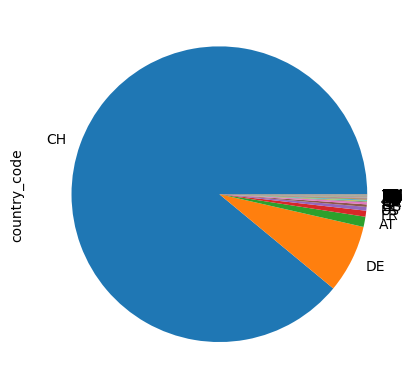

In [89]:
df_accounts.country_code.value_counts().plot(kind='pie');

In [90]:
display(df_accounts.language.nunique())
display(df_accounts.language.unique())
display(df_accounts.language.value_counts())

4

array(['de', 'fr', 'en', nan, 'nl'], dtype=object)

de    10942
fr     4286
en     1794
nl        1
Name: language, dtype: int64

In [91]:
df_accounts.onetime_rental_count.unique()

array([  0,   1,   8,   2,  10,   3,  12,  23,   4,   6,  15,   5,  14,
         7,  11,  29,  16,   9,  22,  17,  39,  26,  19,  13,  27,  47,
        18,  37,  20,  24,  32,  53,  21,  28,  25,  31, 106,  52,  48,
        44,  51,  35,  30,  65,  45,  38,  61,  57,  79])

In [92]:
display(df_accounts.subscription_count.unique())
display(df_accounts.subscription_count.value_counts())
#most have no subscription (assumption: onetime-viewer and gifted movie?)

array([ 1,  0,  2,  3,  6,  4,  5,  7, 11,  8, 12,  9, 13])

0     8103
1     6776
2     1613
3      412
4       96
5       36
7       19
6       13
8        7
11       1
12       1
9        1
13       1
Name: subscription_count, dtype: int64

In [93]:
#Check for accounts with no subscription
#display(df_accounts.subscription_count.unique())
df_accounts['subscription_count'].apply(lambda x: True if x == 0 else False).value_counts()

False    8976
True     8103
Name: subscription_count, dtype: int64

In [94]:
df_accounts.isna().sum()

account_key              0
postal_code             13
city                    10
language                56
country_code             0
onetime_rental_count     0
subscription_count       0
dtype: int64

# PLAYBACKS

In [95]:
# Read playbacks
df_playbacks = pd.read_csv(playbacks)
df_playbacks.columns = df_playbacks.columns.str.lower()
display(df_playbacks.shape)
display(df_playbacks.head())
# one account can have multiple subscriptions
# what about pausing the movie
# IP + User_Agent-> check for multiple persons per subscriptions
    # IP/Account
# average playback duration
# cancelled session?

(139569, 7)

,subscription_key,account_key,movie_id,date_start,playback_time,user_agent,ip_hash
0,9679626b6cc1765f8bc8da98fda2d8e8f28f40736fd777...,024ebde74e23ca924cff0a3989e7f87efe2b2cbcd7ad2c...,1189,2022-09-30 23:55:31,12420,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,0b14aa31d5635ee899be928089fd810c655a7ec7785911...
1,513d006472c99ef047c64bafad57a39906ad5c618505b1...,8968e3851322a89c265a0ec4c81341361e3b0953502d65...,1327,2022-09-30 23:48:36,1440,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4...,c65100e7d48b9e06ca6d89ffe594066553ea63ddc70ee1...
2,cac0c77d3aedc55303b8dfea314052eba5dcf4817e4962...,8a2d7ac64595778ed5fe7edb2dd43f843f9879d773df1a...,212,2022-09-30 23:47:33,1080,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,db17d38bf724c377dcd463f7ad8df8279b6122c8890773...
3,a35503448084642ac8651a0f482db410ccdd7c7716df1d...,7f654ed491a8d1c5b6eb54ea98f6b30b0f9d9515aaad22...,108,2022-09-30 23:46:52,5400,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,69839531a94bf2468744c083a7bf4b78f39c8b1b299c34...
4,ff97a5e4ea0bb411f72e2e1750fb94b248ec2026406a3f...,6efdbec56858f25686797c974bfa67809a718408bd3631...,1314,2022-09-30 23:16:49,10380,"filmingo v2.1 (83); iOS 15.6.1; iPad8,11",652d233c8526ebefb7a8e939ca546fe1a76498775b682a...


In [96]:
df_playbacks.isna().sum()

subscription_key    0
account_key         0
movie_id            0
date_start          0
playback_time       0
user_agent          0
ip_hash             0
dtype: int64

In [97]:
df_playbacks.max()
# have a closer look at max playback times

subscription_key    fffe489d9291d575639f4ee57784bddc34a0dc30dc9218...
account_key         ffed1fe66e00a95d26b05eca11694e4da34b241e3f65b9...
movie_id                                                         1344
date_start                                        2022-09-30 23:55:31
playback_time                                                  472920
user_agent                   filmingo v2.1 (83); iOS 16.1; iPhone14,4
ip_hash             fffcf002d4b3f89687a26ad589d018359e7bff98cb9208...
dtype: object

In [98]:
df_playbacks.movie_id.nunique()

1202

In [99]:
df_playbacks['user_agent'].value_counts().tail(20)


Mozilla/5.0 (Linux; Android 10; ELS-NX9; HMSCore 5.2.0.324) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 HuaweiBrowser/11.0.6.305 Mobile Safari/537.36    1
Mozilla/5.0 (Linux; Android 10; CLT-L29) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.82 Mobile Safari/537.36                                                 1
Mozilla/5.0 (Linux; Android 9; SM-T820) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.82 Safari/537.36                                                         1
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36                                                1
Mozilla/5.0 (Linux; Android 10; SM-T720) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.82 Safari/537.36                                                        1
Mozilla/5.0 (Linux; Android 5.1.1) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Focus/4.8 Chrome/87.0.4280.101 Mobile Safari/537.36        

# SUBSCRIPTIONS

In [100]:
# Read subscriptions
df_subscriptions = pd.read_csv(subscriptions)
df_subscriptions.columns = df_subscriptions.columns.str.lower()
df_subscriptions_clean = df_subscriptions

display(df_subscriptions.shape)
display(df_subscriptions.head(10))

(12115, 9)

,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False
4,29f98a3154a679f2fe953b1f3b148ddffcb28e60fff719...,8759ab0e44c1cf688770220cf1b87efac2726baca6bfcb...,eur,11.0,STANDARD,1,2017-10-13,2021-10-12,False
5,f5627e4ef66f219cfbcfb507a056bf1a0629f085a46e92...,c5511d59d31159ecb87ca1d7cfb3e44a6c4a4b96e5632a...,chf,240.0,PATRON,0,2017-11-18,2020-11-17,False
6,8e42bc7151b4b0dd29e362b95fec4aa3b8e53c532d40ba...,7f1182ed60acb48e4a55eb54b91bca7f20c55c066d8848...,chf,150.0,STANDARD,0,2017-12-20,2021-12-19,False
7,9f22270608209a507f93f3a74448a78a82f9741bc36ea3...,2c2621bf34f1cc419c0868f27ffece66dc1fb4f5ec665c...,chf,9.0,BASIC,1,2017-12-21,2020-11-08,False
8,03411f3ad7d86f2e1df3db5a337c3025ba35159eb9b41e...,163db260041d30a58540a19312d416c9fc7cc696754108...,chf,9.0,BASIC,1,2017-12-22,2020-10-08,False
9,c254cee83dfc67c794b843a0ad622456cb36fdfe5143c4...,47e795383bff3d37a251be1d911ffc0a7ca6f0da8b70a4...,chf,240.0,PATRON,0,2017-12-31,2022-12-30,False


In [102]:
# Create two columns for chf and eur based on the subscription_type and prices from the filmingo website

# create a list of our conditions
conditions = [
    ((df_subscriptions_clean['subscription_type'] == 'BASIC') & (df_subscriptions_clean['subscription_monthly'] == 0)),
    ((df_subscriptions_clean['subscription_type'] == 'BASIC') & (df_subscriptions_clean['subscription_monthly'] == 1)),
    ((df_subscriptions_clean['subscription_type'] == 'STANDARD') & (df_subscriptions_clean['subscription_monthly'] == 0)),
    ((df_subscriptions_clean['subscription_type'] == 'STANDARD') & (df_subscriptions_clean['subscription_monthly'] == 1)),
    ((df_subscriptions_clean['subscription_type'] == 'PATRON') & (df_subscriptions_clean['subscription_monthly'] == 0))

]

# create a list of the values we want to assign for each condition
values_chf = ['90.0', '9.0', '150.0', '15.0', '240.0']
values_eur = ['75.0', '7.5', '125.0', '12.5', '200.0']

# create a new column and use np.select to assign values to it using our lists as arguments
df_subscriptions_clean['price_chf'] = np.select(conditions, values_chf)
df_subscriptions_clean['price_eur'] = np.select(conditions, values_eur)




In [103]:
df_subscriptions_clean.isna().sum()

subscription_key           0
account_key                0
currency                   0
price                   1636
subscription_type          0
subscription_monthly       0
subscription_start         0
subscription_end           0
gift_subscription          0
price_chf                  0
price_eur                  0
dtype: int64

In [104]:
df_subscriptions_clean.subscription_type.unique()

array(['BASIC', 'STANDARD', 'PATRON', 'FULLACCESS'], dtype=object)

In [105]:
# drop "wrong" price columns
df_subscriptions_clean.drop(df_subscriptions_clean[(df_subscriptions['subscription_type'] == 'FULLACCESS')].index, inplace = True)

In [106]:
display(df_subscriptions.shape)
df_subscriptions_clean.shape

(12114, 11)

(12114, 11)

In [108]:
#set data types for sub dates to datetime
df_subscriptions_clean['subscription_start'] = pd.to_datetime(df_subscriptions_clean['subscription_start'])
df_subscriptions_clean['subscription_end'] = pd.to_datetime(df_subscriptions_clean['subscription_end'])
#create new column and calculate subscription duration for 1/2 year gift subsc.
df_subscriptions_clean['subscription_months'] = ((df_subscriptions_clean.subscription_end) - df_subscriptions_clean.subscription_start)/np.timedelta64(1, 'M')

In [115]:
df_subscriptions_clean.head()

,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription,price_chf,price_eur,subscription_months
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False,90.0,75.0,47.968131
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False,90.0,75.0,71.952196
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False,9.0,7.5,60.387277
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False,90.0,75.0,47.968131
4,29f98a3154a679f2fe953b1f3b148ddffcb28e60fff719...,8759ab0e44c1cf688770220cf1b87efac2726baca6bfcb...,eur,11.0,STANDARD,1,2017-10-13,2021-10-12,False,15.0,12.5,47.968131


In [116]:
gifted_df= df_subscriptions_clean.loc[df_subscriptions_clean['gift_subscription']==True]
gifted_df['months'] = gifted_df['subscription_months'].round()
gifted_df.tail(15)
display(gifted_df.groupby('subscription_months').max())
gifted_df.groupby('subscription_months').sum()

#check if 1/2 year gift subscription

/var/folders/kv/lzhtj_957qz928sbb_bt_v1w0000gn/T/ipykernel_57737/4053768563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifted_df['months'] = gifted_df['subscription_months'].round()


,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription,price_chf,price_eur,months
subscription_months,,,,,,,,,,,,
0.361404,f395951490e1eed13f1531cc7c22fa53086bb8de500e78...,89dd74108fdf42ed804e13f9d242c68c4c36a6ced96333...,chf,NaN,STANDARD,0,2020-11-29,2020-12-10,True,150.0,125.0,0.0
0.689953,976286075f23cbf61764d18aab0da34af6af89abc114fe...,c84efd11434d15930e24675fb05453541bee6ac999e2dd...,chf,NaN,BASIC,0,2021-02-12,2021-03-05,True,90.0,75.0,1.0
0.985647,53f6b422a4ef3041214558c016781845284ce0ac0964a7...,ccab8d12b4193a5e04fab5508977faffa10a5ace7985d9...,chf,NaN,STANDARD,0,2021-04-05,2021-05-05,True,150.0,125.0,1.0
1.807019,7b4bf85404472b3a74dc8d7e5abac96a39a17f7362668d...,93508e5440fcd700b6a64a51f47127bd40397c702c83ea...,chf,NaN,BASIC,0,2021-01-02,2021-02-26,True,90.0,75.0,2.0
2.792665,b8235eea33f0df350156c06353745f13ab14b4445be73e...,fd093c1bc21fcba8a15fcd0086ad7f0b2b392d39449755...,chf,NaN,BASIC,0,2020-12-25,2021-03-20,True,90.0,75.0,3.0
2.891230,8c3c07df87ff40e76a881341e1dde35120f6e70db4b881...,7e090242dc27ae5b8e00f90ec5230f0fbbe087c7f97e03...,chf,NaN,BASIC,0,2021-02-09,2021-05-08,True,90.0,75.0,3.0
2.924085,aa60db9a01864f41c9f7f2f999faa74a6d253877f0b0eb...,e8632266c18697f404ecc140fcd60ae65de6defc133b84...,chf,NaN,BASIC,0,2021-12-25,2022-03-24,True,90.0,75.0,3.0
2.956940,cff283f493a69600c69bbba11cbb02fc9c09f785d40908...,f71902c82cde7a6802825590c96ff6ae1e6b3246e77f92...,chf,NaN,BASIC,0,2022-09-20,2022-12-19,True,90.0,75.0,3.0
2.989794,eda6021733424e8ff5008c0a7386aa088b9ab1bc846550...,df124b328357d1e394ce5706f111b08249a4590a88b821...,chf,NaN,BASIC,0,2022-11-12,2023-02-11,True,90.0,75.0,3.0


,price,subscription_monthly,gift_subscription,months
subscription_months,,,,
0.361404,0.0,0,1,0.0
0.689953,0.0,0,1,1.0
0.985647,0.0,0,1,1.0
1.807019,0.0,0,1,2.0
2.792665,0.0,0,1,3.0
2.891230,0.0,0,3,9.0
2.924085,0.0,0,5,15.0
2.956940,0.0,0,4,12.0
2.989794,0.0,0,6,18.0


#  Add Country Names, Region & Sub-Region

In [111]:
cntrycd= './data/country_code.csv'
df_cntrycd = pd.read_csv(cntrycd)
df_cntrycd.columns = df_cntrycd.columns.str.lower()
display(df_cntrycd.shape)
display(df_cntrycd.head())

(249, 11)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [112]:
#merge name on Alpha code
df_cntrycd2 = df_cntrycd[['name', 'alpha-2', 'region', 'sub-region']]
df_cntrycd2.rename(columns = {'alpha-2':'country_code', 'name':'country_name'}, inplace = True)
df_cntrycd2.head()

/var/folders/kv/lzhtj_957qz928sbb_bt_v1w0000gn/T/ipykernel_57737/123359011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cntrycd2.rename(columns = {'alpha-2':'country_code', 'name':'country_name'}, inplace = True)


,country_name,country_code,region,sub-region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia


In [113]:
df_accounts = pd.merge(df_accounts, df_cntrycd2, on='country_code', how='left')
df_accounts.head()

,account_key,postal_code,city,language,country_code,onetime_rental_count,subscription_count,country_name,region,sub-region
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,0,1,Switzerland,Europe,Western Europe
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,0,1,Switzerland,Europe,Western Europe
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,1,0,Switzerland,Europe,Western Europe
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,0,2,Switzerland,Europe,Western Europe
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,8,2,Switzerland,Europe,Western Europe


In [114]:
df_accounts2.groupby(['region', 'sub-region', 'country_name']).sum()

onetime_rental_count  \
region   sub-region                      country_name                                                               
Africa   Northern Africa                 Egypt                                                                  2   
         Sub-Saharan Africa              Côte d'Ivoire                                                          1   
                                         Gabon                                                                  0   
                                         Ghana                                                                  1   
                                         South Africa                                                           2   
Americas Latin America and the Caribbean Brazil                                                                 1   
                                         Chile                                                                  2   
                                         Colombia                                                               0   
                                         Mexico                                                                 3   
                                         Peru                                                                   0   
         Northern America                Canada                                                                13   
                                         United States of America                                              66   
Asia     Eastern Asia                    Hong Kong                                                              0   
                                         Japan                                                                  1   
                                         Korea, Republic of                                                     3   
         South-eastern Asia              Indonesia                                                              2   
                                         Malaysia                                                               1   
                                         Singapore                                                              0   
                                         Thailand                                                               0   
         Southern Asia                   India                                                                  5   
                                         Iran (Islamic Republic of)                                             1   
         Western Asia                    Israel                                                                 2   
                                         Jordan                                                                 1   
                                         Saudi Arabia                                                           5   
                                         Turkey                                                                 0   
                                         United Arab Emirates                                                   4   
Europe   Eastern Europe                  Czechia                                                                4   
                                         Hungary                                                               17   
                                         Poland                                                                 3   
                                         Romania                                                                1   
                                         Russian Federation                                                     2   
                                         Slovakia                                                               1   
                                         Ukraine                                                                0  